In [1]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
ROOT.gROOT.ProcessLine("gErrorIgnoreLevel = 3001;"); # suppress ROOT messages
ROOT.disableJSVis()
ROOT.gStyle.SetOptStat(0)
# ROOT.gROOT.ProcessLine(".x ~/env/MJDClintPlotStyle.C");

# results:
# DS0: 
# raw 99: 1.060  95: 1.057  90: 1.054  01: 0.762  05: 0.952
# bg 99: 1.069  95: 1.063  90: 1.062  01: 0.925  05: 0.964
# ext 99: 1.053  95: 1.048  90: 1.047  01: 0.957  05: 0.985
# DS1:
# raw 99: 1.059  95: 1.056  90: 1.053  01: 0.600  05: 0.913
# bg 99: 1.071  95: 1.065  90: 1.060  01: 0.852  05: 0.966
# DS2: none yet
# DS3:
# raw 99: 1.060  95: 1.056  90: 1.054  01: 0.775  05: 0.952
# bg 99: 1.065  95: 1.060  90: 1.060  01: 0.922  05: 0.999
# DS4:
# raw 99: 1.059  95: 1.053  90: 1.050  01: 0.729  05: 0.930
# bg 99: 1.062  95: 1.057  90: 1.053  01: 0.796  05: 0.951
# DS5:
# raw 99: 1.060  95: 1.057  90: 1.056  01: 0.754  05: 0.948
# bg 99: 1.066  95: 1.063  90: 1.062  01: 0.600  05: 0.960

def npTH1D(hist,lower,upper):
    bins = hist.GetNbinsX()
    xArr = np.arange(lower,upper,(upper-lower)/float(bins))
    yArr = np.zeros(bins)
    for i in range(bins): yArr[i] = hist.GetBinContent(i)    
    return xArr,yArr

def integFunc(arr):
    integ = np.zeros(len(arr))
    sum = 0
    for i in range(0,len(arr)):
        sum+=arr[i]
        integ[i] = sum
    return integ

def GetIntegralPoints(hist,lower,upper):
    x_h0, y_h0 = npTH1D(hist,lower,upper)
    int_h0 = integFunc(y_h0)
    
    idx99 = np.where(int_h0 > 0.99)
    idx95 = np.where(int_h0 > 0.95)
    idx90 = np.where(int_h0 > 0.90)
    idx01 = np.where(int_h0 > 0.01)
    idx05 = np.where(int_h0 > 0.05)
    idx10 = np.where(int_h0 > 0.10)
    idx15 = np.where(int_h0 > 0.15)
    
    val99 = x_h0[idx99][0]
    val95 = x_h0[idx95][0]
    val90 = x_h0[idx90][0]
    val01 = x_h0[idx01][0]
    val05 = x_h0[idx05][0]
    val10 = x_h0[idx10][0]
    val15 = x_h0[idx15][0]
    return val01,val05,val10,val15,val90,val95,val99

Welcome to JupyROOT 6.08/06


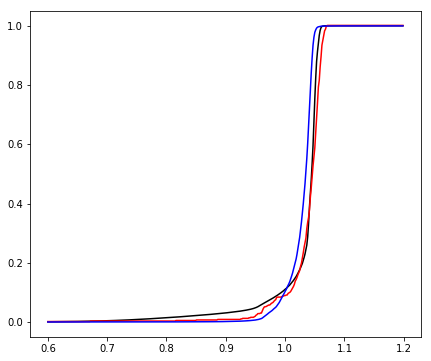

raw 99: 1.060  95: 1.057  90: 1.054  01: 0.762  05: 0.952
bg 99: 1.069  95: 1.063  90: 1.062  01: 0.925  05: 0.964
ext 99: 1.053  95: 1.048  90: 1.047  01: 0.957  05: 0.985


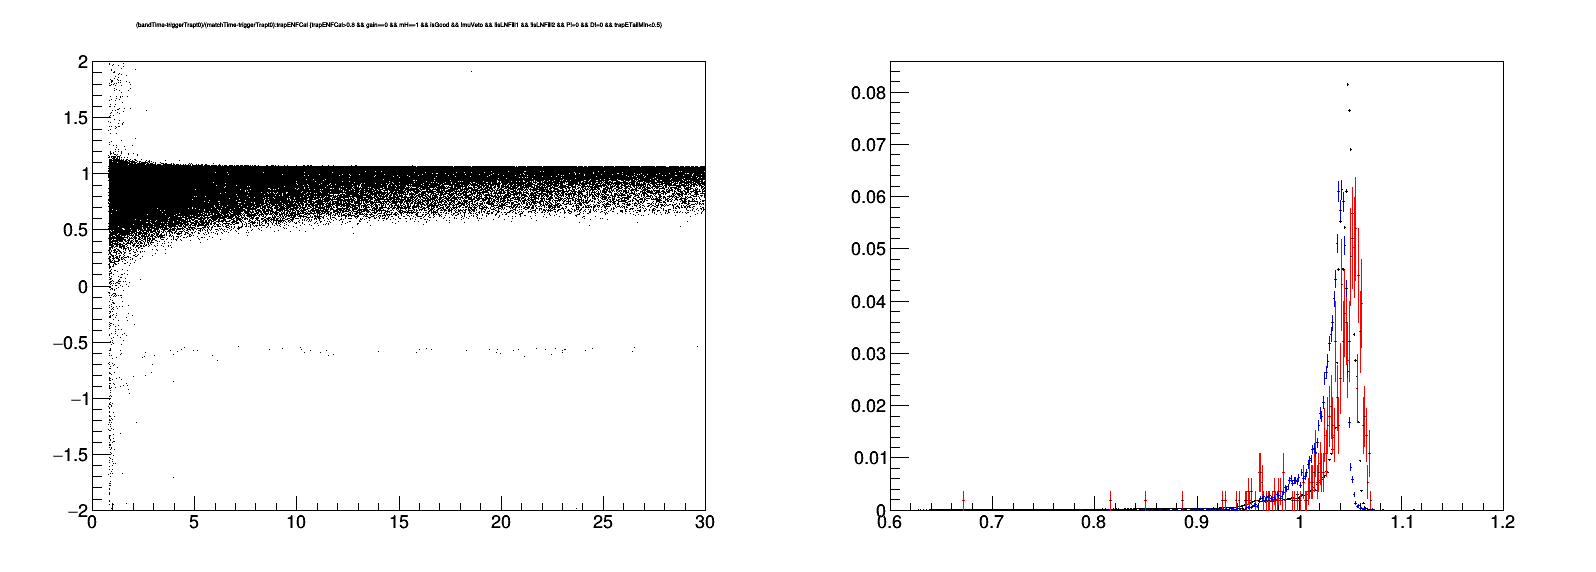

In [7]:
ds = 0
bins, lower, upper = 400,0.6,1.2

f1 = ROOT.TFile("~/project/lat/latSkimDS%d_0_0.root"%ds)
theCut = f1.Get("theCut").GetTitle()
bgCut = "&& isNat && trapENFCal > 9.8 && trapENFCal < 10.8" # Integrating over 10.4 keV peak
ExtCut = "channel == 624"
calib = ROOT.TChain("skimTree"); calib.Add("~/project/cal-lat/latSkimDS%d*.root"%ds)
bg = ROOT.TChain("skimTree"); bg.Add("~/project/lat/latSkimDS%d*.root"%ds)
Ext = ROOT.TChain("mjdTree"); Ext.Add("~/project/ForceTrigger/lat_run72*.root")

c = ROOT.TCanvas("c","c",1600,600)
c.Divide(2,1)
c.cd(1) 

# make the raw spectrum
ROOT.gPad.SetLogy(0)
calib.Draw("(bandTime-triggerTrapt0)/(matchTime-triggerTrapt0):trapENFCal>>h1(10,0,30,10,-2,2)",theCut)

c.cd(2)
ROOT.gPad.SetLogy(0)
ROOT.gPad.SetLogx(0)

h0 = ROOT.TH1D("h0","",bins,lower,upper)
h01 = ROOT.TH1D("h01","",bins,lower,upper)
h02 = ROOT.TH1D("h02","",bins,lower,upper)
calib.Project("h0","(bandTime-triggerTrapt0)/(matchTime-triggerTrapt0)",theCut+"&& trapENFCal > 5")
bg.Project("h01","(bandTime-triggerTrapt0)/(matchTime-triggerTrapt0)",theCut+bgCut)
Ext.Project("h02","(bandTime-triggerTrapt0)/(matchTime-triggerTrapt0)",ExtCut)
h0.Scale(1/h0.Integral()); h0.SetLineColor(ROOT.kBlack); h0.Draw()
h01.Scale(1/h01.Integral()); h01.SetLineColor(ROOT.kRed); h01.Draw("SAME")
h02.Scale(1/h02.Integral()); h02.SetLineColor(ROOT.kBlue); h02.Draw("SAME")
c.Draw()

# Direct integral method
raw01,raw05,raw10,raw15,raw90,raw95,raw99 = GetIntegralPoints(h0,lower,upper)
bg01,bg05,bg10,bg15,bg90,bg95,bg99 = GetIntegralPoints(h01,lower,upper)
ext01,ext05,ext10,ext15,ext90,ext95,ext99 = GetIntegralPoints(h02,lower,upper)
print "raw 99: %.3f  95: %.3f  90: %.3f  01: %.3f  05: %.3f" % (raw99,raw95,raw90,raw01,raw05)
print "bg 99: %.3f  95: %.3f  90: %.3f  01: %.3f  05: %.3f" % (bg99,bg95,bg90,bg01,bg05)
print "ext 99: %.3f  95: %.3f  90: %.3f  01: %.3f  05: %.3f" % (ext99,ext95,ext90,ext01,ext05)

fig = plt.figure(figsize=(7,6),facecolor='w')
x_h0, y_h0 = npTH1D(h0,lower,upper)
int_h0 = integFunc(y_h0)
plt.plot(x_h0,int_h0,'black')
x1_h0, y1_h0 = npTH1D(h01,lower,upper)
int1_h0 = integFunc(y1_h0)
plt.plot(x1_h0,int1_h0,'red')
x2_h0, y2_h0 = npTH1D(h02,lower,upper)
int2_h0 = integFunc(y2_h0)
plt.plot(x2_h0,int2_h0,'blue')
# plt.axvline(raw95,color='red')
# plt.axvline(raw99,color='green')
# plt.axvline(raw01,color='green')
# plt.axvline(raw05,color='red')
plt.show()

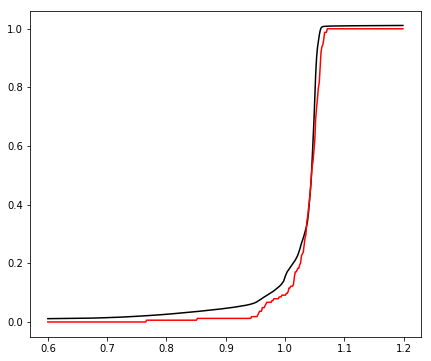

raw 99: 1.059  95: 1.056  90: 1.053  01: 0.600  05: 0.913
bg 99: 1.071  95: 1.065  90: 1.060  01: 0.852  05: 0.966


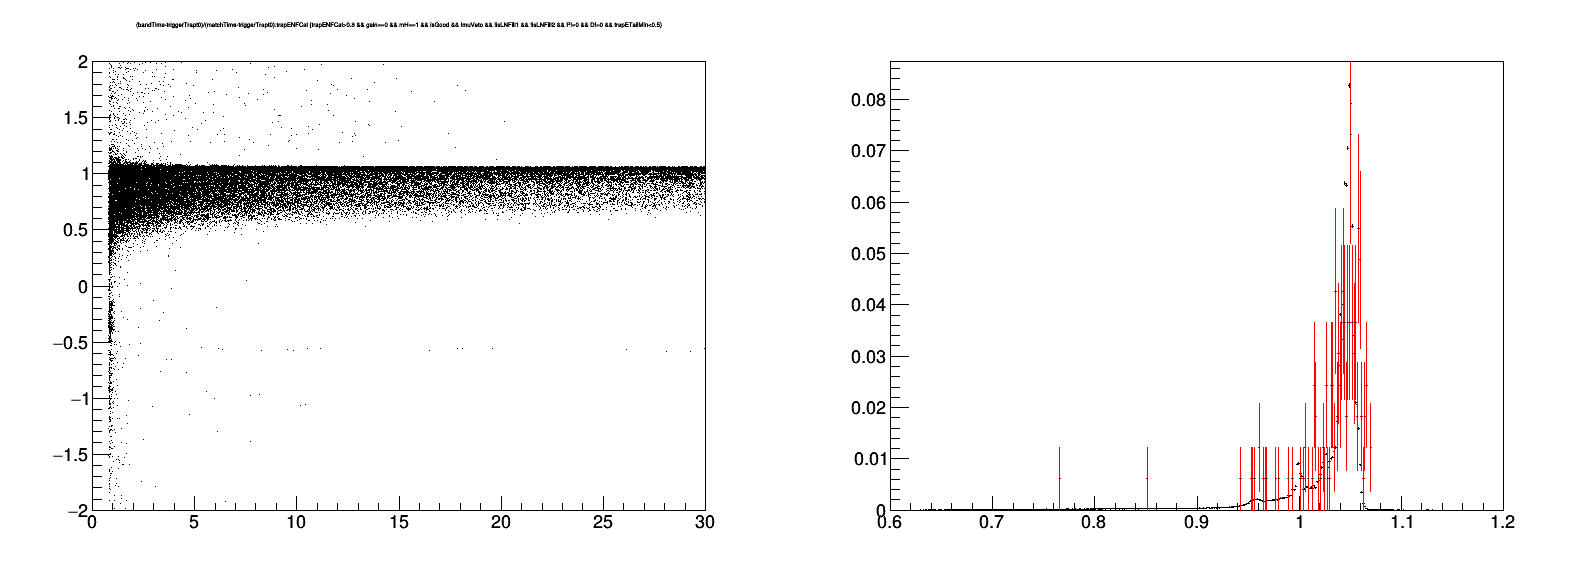

In [8]:
ds = 1
bins, lower, upper = 400,0.6,1.2

f1 = ROOT.TFile("~/project/lat/latSkimDS%d_0_0.root"%ds)
theCut = f1.Get("theCut").GetTitle()
bgCut = "&& isNat && trapENFCal > 9.8 && trapENFCal < 10.8" # Integrating over 10.4 keV peak
calib = ROOT.TChain("skimTree"); calib.Add("~/project/cal-lat/latSkimDS%d*.root"%ds)
bg = ROOT.TChain("skimTree"); bg.Add("~/project/lat/latSkimDS%d*.root"%ds)

c = ROOT.TCanvas("c","c",1600,600)
c.Divide(2,1)
c.cd(1) 

# make the raw spectrum
ROOT.gPad.SetLogy(0)
calib.Draw("(bandTime-triggerTrapt0)/(matchTime-triggerTrapt0):trapENFCal>>h1(10,0,30,10,-2,2)",theCut)

c.cd(2)
ROOT.gPad.SetLogy(0)
ROOT.gPad.SetLogx(0)

h0 = ROOT.TH1D("h0","",bins,lower,upper)
h01 = ROOT.TH1D("h01","",bins,lower,upper)
calib.Project("h0","(bandTime-triggerTrapt0)/(matchTime-triggerTrapt0)",theCut+"&& trapENFCal > 5")
bg.Project("h01","(bandTime-triggerTrapt0)/(matchTime-triggerTrapt0)",theCut+bgCut)
h0.Scale(1/h0.Integral()); h0.SetLineColor(ROOT.kBlack); h0.Draw()
h01.Scale(1/h01.Integral()); h01.SetLineColor(ROOT.kRed); h01.Draw("SAME")
c.Draw()

# Direct integral method
raw01,raw05,raw10,raw15,raw90,raw95,raw99 = GetIntegralPoints(h0,lower,upper)
bg01,bg05,bg10,bg15,bg90,bg95,bg99 = GetIntegralPoints(h01,lower,upper)
print "raw 99: %.3f  95: %.3f  90: %.3f  01: %.3f  05: %.3f" % (raw99,raw95,raw90,raw01,raw05)
print "bg 99: %.3f  95: %.3f  90: %.3f  01: %.3f  05: %.3f" % (bg99,bg95,bg90,bg01,bg05)

fig = plt.figure(figsize=(7,6),facecolor='w')
x_h0, y_h0 = npTH1D(h0,lower,upper)
int_h0 = integFunc(y_h0)
plt.plot(x_h0,int_h0,'black')
x1_h0, y1_h0 = npTH1D(h01,lower,upper)
int1_h0 = integFunc(y1_h0)
plt.plot(x1_h0,int1_h0,'red')
# plt.axvline(raw95,color='red')
# plt.axvline(raw99,color='green')
# plt.axvline(raw01,color='green')
# plt.axvline(raw05,color='red')
plt.show()

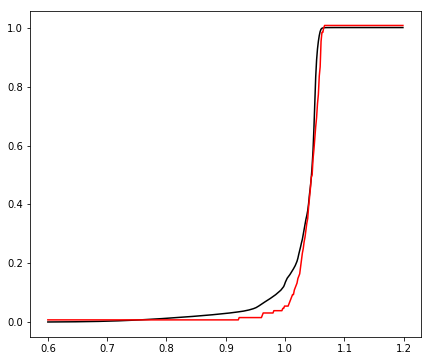

raw 99: 1.060  95: 1.056  90: 1.054  01: 0.775  05: 0.952
bg 99: 1.065  95: 1.060  90: 1.060  01: 0.922  05: 0.999


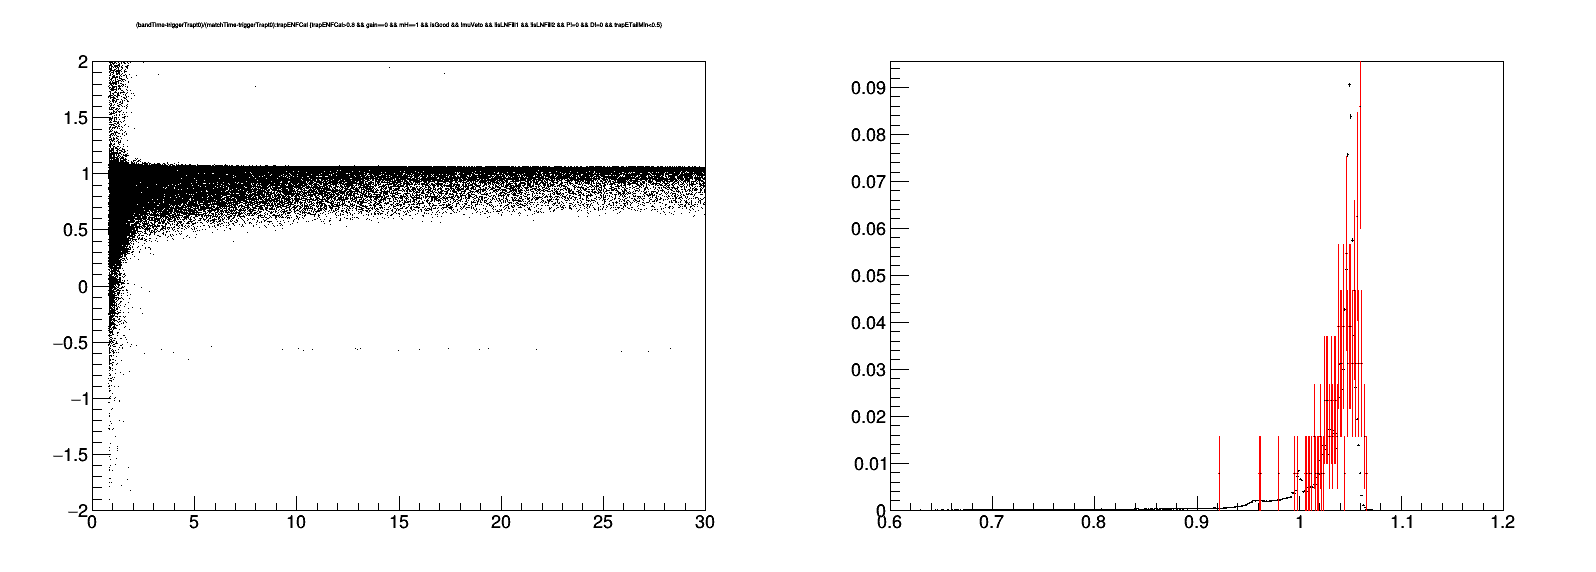

In [9]:
ds = 3
bins, lower, upper = 400,0.6,1.2

f1 = ROOT.TFile("~/project/lat/latSkimDS%d_0_0.root"%ds)
theCut = f1.Get("theCut").GetTitle()
bgCut = "&& isNat && trapENFCal > 9.8 && trapENFCal < 10.8" # Integrating over 10.4 keV peak
calib = ROOT.TChain("skimTree"); calib.Add("~/project/cal-lat/latSkimDS%d*.root"%ds)
bg = ROOT.TChain("skimTree"); bg.Add("~/project/lat/latSkimDS%d*.root"%ds)

c = ROOT.TCanvas("c","c",1600,600)
c.Divide(2,1)
c.cd(1) 

# make the raw spectrum
ROOT.gPad.SetLogy(0)
calib.Draw("(bandTime-triggerTrapt0)/(matchTime-triggerTrapt0):trapENFCal>>h1(10,0,30,10,-2,2)",theCut)

c.cd(2)
ROOT.gPad.SetLogy(0)
ROOT.gPad.SetLogx(0)

h0 = ROOT.TH1D("h0","",bins,lower,upper)
h01 = ROOT.TH1D("h01","",bins,lower,upper)
calib.Project("h0","(bandTime-triggerTrapt0)/(matchTime-triggerTrapt0)",theCut+"&& trapENFCal > 5")
bg.Project("h01","(bandTime-triggerTrapt0)/(matchTime-triggerTrapt0)",theCut+bgCut)
h0.Scale(1/h0.Integral()); h0.SetLineColor(ROOT.kBlack); h0.Draw()
h01.Scale(1/h01.Integral()); h01.SetLineColor(ROOT.kRed); h01.Draw("SAME")
c.Draw()

# Direct integral method
raw01,raw05,raw10,raw15,raw90,raw95,raw99 = GetIntegralPoints(h0,lower,upper)
bg01,bg05,bg10,bg15,bg90,bg95,bg99 = GetIntegralPoints(h01,lower,upper)
print "raw 99: %.3f  95: %.3f  90: %.3f  01: %.3f  05: %.3f" % (raw99,raw95,raw90,raw01,raw05)
print "bg 99: %.3f  95: %.3f  90: %.3f  01: %.3f  05: %.3f" % (bg99,bg95,bg90,bg01,bg05)

fig = plt.figure(figsize=(7,6),facecolor='w')
x_h0, y_h0 = npTH1D(h0,lower,upper)
int_h0 = integFunc(y_h0)
plt.plot(x_h0,int_h0,'black')
x1_h0, y1_h0 = npTH1D(h01,lower,upper)
int1_h0 = integFunc(y1_h0)
plt.plot(x1_h0,int1_h0,'red')
# plt.axvline(raw95,color='red')
# plt.axvline(raw99,color='green')
# plt.axvline(raw01,color='green')
# plt.axvline(raw05,color='red')
plt.show()

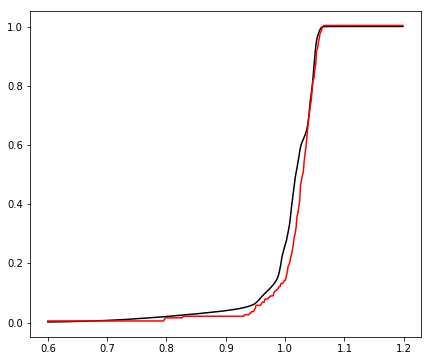

raw 99: 1.059  95: 1.053  90: 1.050  01: 0.729  05: 0.930
bg 99: 1.062  95: 1.057  90: 1.053  01: 0.796  05: 0.951


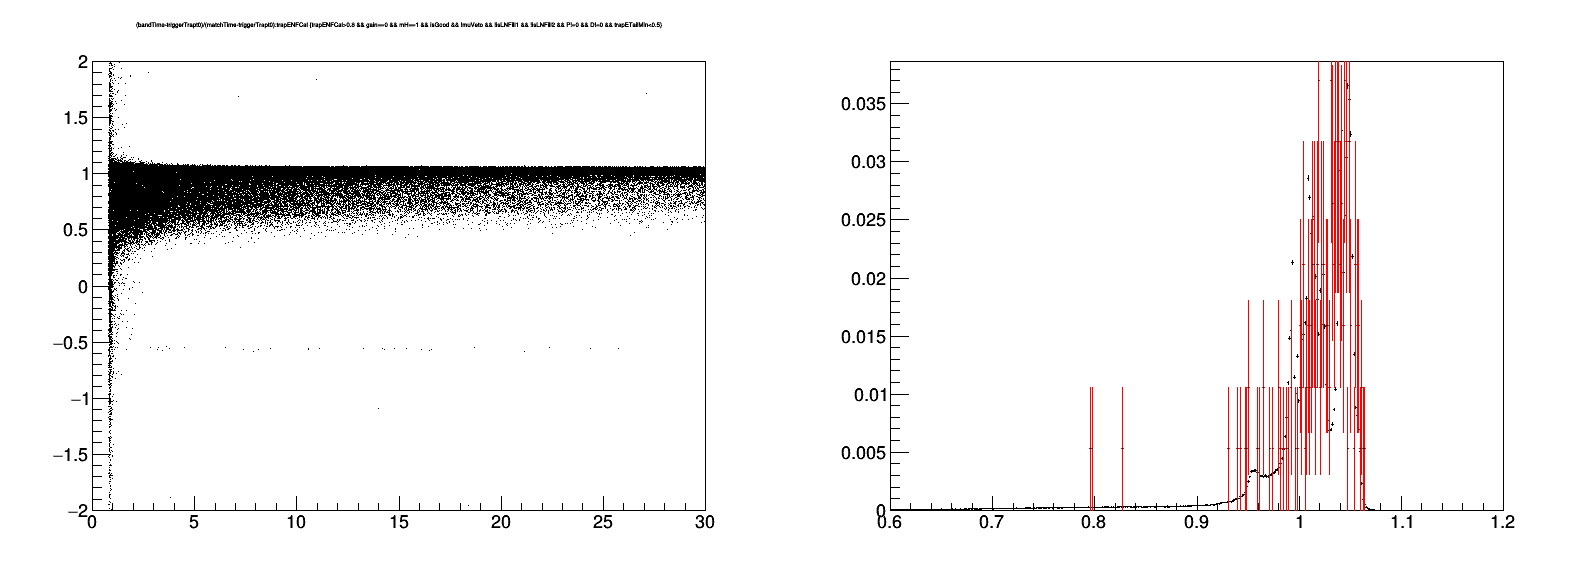

In [10]:
ds = 4
bins, lower, upper = 400,0.6,1.2

f1 = ROOT.TFile("~/project/lat/latSkimDS%d_0_0.root"%ds)
theCut = f1.Get("theCut").GetTitle()
bgCut = "&& isNat && trapENFCal > 9.8 && trapENFCal < 10.8" # Integrating over 10.4 keV peak
calib = ROOT.TChain("skimTree"); calib.Add("~/project/cal-lat/latSkimDS%d*.root"%ds)
bg = ROOT.TChain("skimTree"); bg.Add("~/project/lat/latSkimDS%d*.root"%ds)

c = ROOT.TCanvas("c","c",1600,600)
c.Divide(2,1)
c.cd(1) 

# make the raw spectrum
ROOT.gPad.SetLogy(0)
calib.Draw("(bandTime-triggerTrapt0)/(matchTime-triggerTrapt0):trapENFCal>>h1(10,0,30,10,-2,2)",theCut)

c.cd(2)
ROOT.gPad.SetLogy(0)
ROOT.gPad.SetLogx(0)

h0 = ROOT.TH1D("h0","",bins,lower,upper)
h01 = ROOT.TH1D("h01","",bins,lower,upper)
calib.Project("h0","(bandTime-triggerTrapt0)/(matchTime-triggerTrapt0)",theCut+"&& trapENFCal > 5")
bg.Project("h01","(bandTime-triggerTrapt0)/(matchTime-triggerTrapt0)",theCut+bgCut)
h0.Scale(1/h0.Integral()); h0.SetLineColor(ROOT.kBlack); h0.Draw()
h01.Scale(1/h01.Integral()); h01.SetLineColor(ROOT.kRed); h01.Draw("SAME")
c.Draw()

# Direct integral method
raw01,raw05,raw10,raw15,raw90,raw95,raw99 = GetIntegralPoints(h0,lower,upper)
bg01,bg05,bg10,bg15,bg90,bg95,bg99 = GetIntegralPoints(h01,lower,upper)
print "raw 99: %.3f  95: %.3f  90: %.3f  01: %.3f  05: %.3f" % (raw99,raw95,raw90,raw01,raw05)
print "bg 99: %.3f  95: %.3f  90: %.3f  01: %.3f  05: %.3f" % (bg99,bg95,bg90,bg01,bg05)

fig = plt.figure(figsize=(7,6),facecolor='w')
x_h0, y_h0 = npTH1D(h0,lower,upper)
int_h0 = integFunc(y_h0)
plt.plot(x_h0,int_h0,'black')
x1_h0, y1_h0 = npTH1D(h01,lower,upper)
int1_h0 = integFunc(y1_h0)
plt.plot(x1_h0,int1_h0,'red')
# plt.axvline(raw95,color='red')
# plt.axvline(raw99,color='green')
# plt.axvline(raw01,color='green')
# plt.axvline(raw05,color='red')
plt.show()

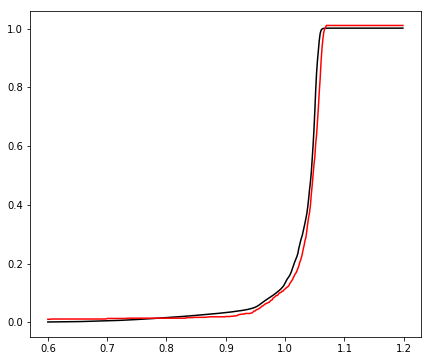

raw 99: 1.060  95: 1.057  90: 1.056  01: 0.754  05: 0.948
bg 99: 1.066  95: 1.063  90: 1.062  01: 0.600  05: 0.960


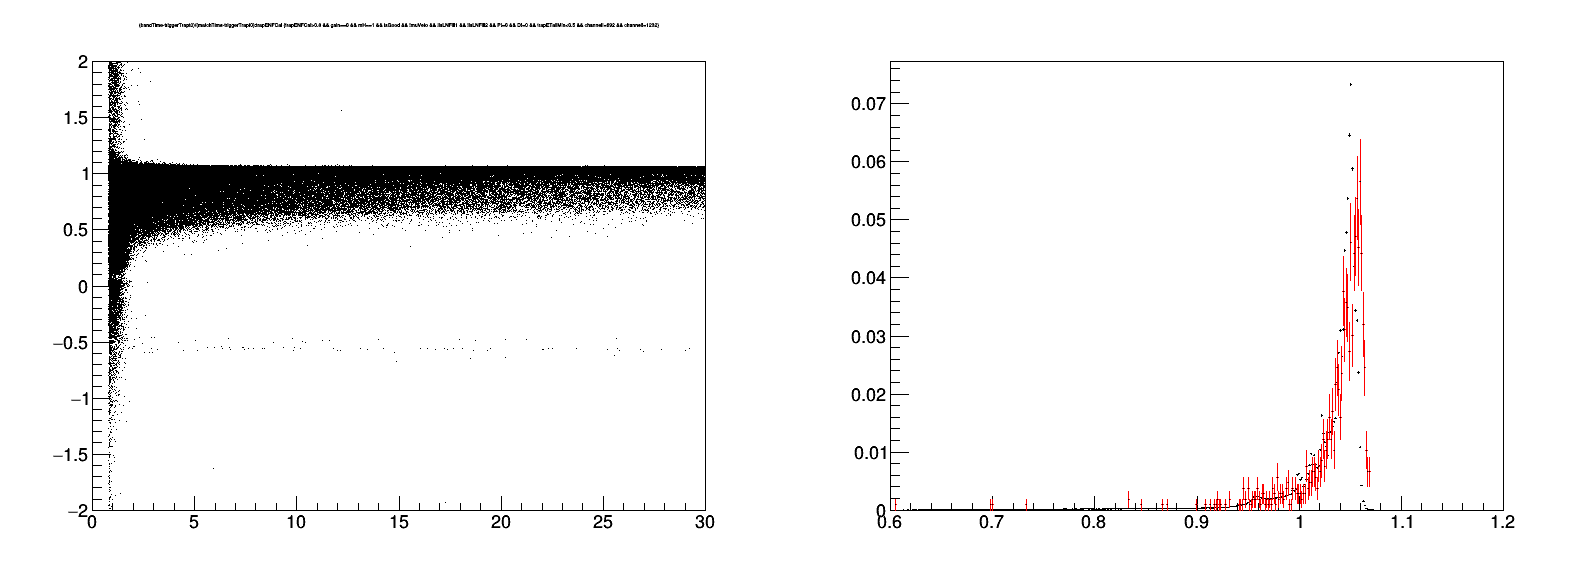

In [11]:
ds = 5
bins, lower, upper = 400,0.6,1.2

f1 = ROOT.TFile("~/project/lat/latSkimDS%d_0_0.root"%ds)
theCut = f1.Get("theCut").GetTitle()
bgCut = "&& isNat && trapENFCal > 9.8 && trapENFCal < 10.8" # Integrating over 10.4 keV peak
calib = ROOT.TChain("skimTree"); calib.Add("~/project/cal-lat/latSkimDS%d*.root"%ds)
bg = ROOT.TChain("skimTree"); bg.Add("~/project/lat/latSkimDS%d*.root"%ds)

c = ROOT.TCanvas("c","c",1600,600)
c.Divide(2,1)
c.cd(1) 

# make the raw spectrum
ROOT.gPad.SetLogy(0)
calib.Draw("(bandTime-triggerTrapt0)/(matchTime-triggerTrapt0):trapENFCal>>h1(10,0,30,10,-2,2)",theCut)

c.cd(2)
ROOT.gPad.SetLogy(0)
ROOT.gPad.SetLogx(0)

h0 = ROOT.TH1D("h0","",bins,lower,upper)
h01 = ROOT.TH1D("h01","",bins,lower,upper)
calib.Project("h0","(bandTime-triggerTrapt0)/(matchTime-triggerTrapt0)",theCut+"&& trapENFCal > 5")
bg.Project("h01","(bandTime-triggerTrapt0)/(matchTime-triggerTrapt0)",theCut+bgCut)
h0.Scale(1/h0.Integral()); h0.SetLineColor(ROOT.kBlack); h0.Draw()
h01.Scale(1/h01.Integral()); h01.SetLineColor(ROOT.kRed); h01.Draw("SAME")
c.Draw()

# Direct integral method
raw01,raw05,raw10,raw15,raw90,raw95,raw99 = GetIntegralPoints(h0,lower,upper)
bg01,bg05,bg10,bg15,bg90,bg95,bg99 = GetIntegralPoints(h01,lower,upper)
print "raw 99: %.3f  95: %.3f  90: %.3f  01: %.3f  05: %.3f" % (raw99,raw95,raw90,raw01,raw05)
print "bg 99: %.3f  95: %.3f  90: %.3f  01: %.3f  05: %.3f" % (bg99,bg95,bg90,bg01,bg05)

fig = plt.figure(figsize=(7,6),facecolor='w')
x_h0, y_h0 = npTH1D(h0,lower,upper)
int_h0 = integFunc(y_h0)
plt.plot(x_h0,int_h0,'black')
x1_h0, y1_h0 = npTH1D(h01,lower,upper)
int1_h0 = integFunc(y1_h0)
plt.plot(x1_h0,int1_h0,'red')
# plt.axvline(raw95,color='red')
# plt.axvline(raw99,color='green')
# plt.axvline(raw01,color='green')
# plt.axvline(raw05,color='red')
plt.show()